In [1]:
import cv2, os, random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from glob import glob
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split

In [3]:
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
path = 'dataset/dogs-vs-cats/test1'

In [5]:
ROW, COL = 96, 96

classes = ['dog', 'cat']
dogs, cats = [], []
y_dogs, y_cats = [], []

In [31]:
dog_path = os.path.join(path, '{}.*'.format(range(1,10000)))

In [32]:
glob.glob

'dataset/dogs-vs-cats/train\\range(1, 10000).*'

In [30]:
len(glob(dog_path))

0

In [33]:
dog_path = os.path.join(path, 'dog.5*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW, COL))
    dog = image.img_to_array(dog)
    dogs.append(dog)
print('All dog images loaded')

All dog images loaded


In [9]:
cat_path = os.path.join(path, 'cat.5*')
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)
print('All cat images loaded')

All cat images loaded


In [10]:
def shows(label):
    plt.figure(figsize=(12, 8))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        img = image.array_to_img(random.choice(label))
        plt.imshow(img, cmap=plt.get_cmap('gray'))

        plt.axis('off')
        if label == 'dog':
            class_num = 0
        else:
            class_num = 1
        plt.title('It should be a {}'.format(classes[class_num]))
    plt.show()

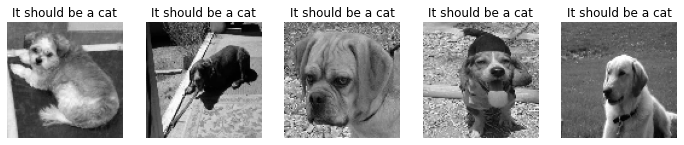

In [11]:
shows(dogs)

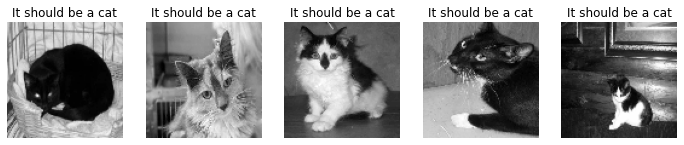

In [12]:
shows(cats)

In [13]:
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [14]:
dogs = np.asarray(dogs).astype('float32') / 255
cats = np.asarray(cats).astype('float32') / 255
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [15]:
x = np.concatenate((dogs, cats), axis=0)
y = np.concatenate((y_dogs, y_cats), axis=0)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=seed)

In [17]:
x_train.shape

(1777, 96, 96, 1)

In [18]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(ROW, COL, 1), 
           activation='relu'),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(.5),
    Dense(1, activation='sigmoid')
    
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0

In [20]:
model.compile(loss = 'binary_crossentropy',
             optimizer = keras.optimizers.Nadam(),
             metrics = ['accuracy'])

In [21]:
early_stopping_cb = EarlyStopping(patience=50)

In [22]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=1000, batch_size=128, callbacks=[early_stopping_cb])

Train on 1421 samples, validate on 356 samples
Epoch 1/1000
1421/1421 [==============================] - 22s 15ms/sample - loss: 1.0037 - accuracy: 0.4806 - val_loss: 0.6927 - val_accuracy: 0.4888
Epoch 2/1000
1421/1421 [==============================] - 21s 15ms/sample - loss: 0.6912 - accuracy: 0.5559 - val_loss: 0.6935 - val_accuracy: 0.4916
Epoch 3/1000
1421/1421 [==============================] - 21s 14ms/sample - loss: 0.6911 - accuracy: 0.5215 - val_loss: 0.6916 - val_accuracy: 0.4888
Epoch 4/1000
1421/1421 [==============================] - 21s 15ms/sample - loss: 0.6863 - accuracy: 0.5461 - val_loss: 0.6914 - val_accuracy: 0.5112
Epoch 5/1000
1421/1421 [==============================] - 21s 14ms/sample - loss: 0.6770 - accuracy: 0.5792 - val_loss: 0.7144 - val_accuracy: 0.5506
Epoch 6/1000
1421/1421 [==============================] - 21s 15ms/sample - loss: 0.6636 - accuracy: 0.6017 - val_loss: 0.7241 - val_accuracy: 0.5730
Epoch 7/1000
1421/1421 [=============================

In [23]:
model.evaluate(x_test , y_test, verbose=0)[1]

0.6876404